('TrainDataSetSize: ', 42000)
('TrainDataCount: ', 33600)
('ValidationDataCount: ', 8400)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Learning started. It takes sometime.
('Epoch:', '0001', 'cost =', '0.356971814')
('Epoch:', '0002', 'cost =', '0.098251086')
('Epoch:', '0003', 'cost =', '0.080013855')
('Epoch:', '0004', 'cost =', '0.067106441')
('Epoch:', '0005', 'cost =', '0.061446271')
('Epoch:', '0006', 'cost =', '0.055652953')
('Epoch:', '0007', 'cost =', '0.055204448')
('Epoch:', '0008', 'cost =', '0.051816065')
('Epoch:', '0009', 'cost =', '0.048641984')
('Epoch:', '0010', 'cost =', '0.052766768')
('Epoch:', '0011', 'cost =', '0.050030531')
('Epoch:', '0012', 'cost =', '0.047155441')
('Epoch:', '0013', 'cost =', '0.048708753')
('Epoch:', '0014', 'cost =', '0.042990405')
('Epoch:', '0015', 'cost =', '0.048306714')
Learning Finished!
('Acc

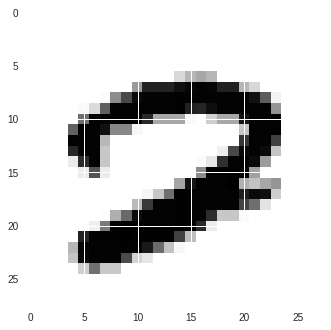

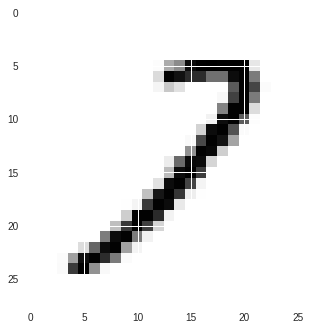

('Test_x: ', (28000, 784))
('Test Data Count: ', 28000)
('test: ', 0, ' / ', 280)
('test: ', 1, ' / ', 280)
('test: ', 2, ' / ', 280)
('test: ', 3, ' / ', 280)
('test: ', 4, ' / ', 280)
('test: ', 5, ' / ', 280)
('test: ', 6, ' / ', 280)
('test: ', 7, ' / ', 280)
('test: ', 8, ' / ', 280)
('test: ', 9, ' / ', 280)
('test: ', 10, ' / ', 280)
('test: ', 11, ' / ', 280)
('test: ', 12, ' / ', 280)
('test: ', 13, ' / ', 280)
('test: ', 14, ' / ', 280)
('test: ', 15, ' / ', 280)
('test: ', 16, ' / ', 280)
('test: ', 17, ' / ', 280)
('test: ', 18, ' / ', 280)
('test: ', 19, ' / ', 280)
('test: ', 20, ' / ', 280)
('test: ', 21, ' / ', 280)
('test: ', 22, ' / ', 280)
('test: ', 23, ' / ', 280)
('test: ', 24, ' / ', 280)
('test: ', 25, ' / ', 280)
('test: ', 26, ' / ', 280)
('test: ', 27, ' / ', 280)
('test: ', 28, ' / ', 280)
('test: ', 29, ' / ', 280)
('test: ', 30, ' / ', 280)
('test: ', 31, ' / ', 280)
('test: ', 32, ' / ', 280)
('test: ', 33, ' / ', 280)
('test: ', 34, ' / ', 280)
('test: '


('test: ', 220, ' / ', 280)
('test: ', 221, ' / ', 280)
('test: ', 222, ' / ', 280)
('test: ', 223, ' / ', 280)
('test: ', 224, ' / ', 280)
('test: ', 225, ' / ', 280)
('test: ', 226, ' / ', 280)
('test: ', 227, ' / ', 280)
('test: ', 228, ' / ', 280)
('test: ', 229, ' / ', 280)
('test: ', 230, ' / ', 280)
('test: ', 231, ' / ', 280)
('test: ', 232, ' / ', 280)
('test: ', 233, ' / ', 280)
('test: ', 234, ' / ', 280)
('test: ', 235, ' / ', 280)
('test: ', 236, ' / ', 280)
('test: ', 237, ' / ', 280)
('test: ', 238, ' / ', 280)
('test: ', 239, ' / ', 280)
('test: ', 240, ' / ', 280)
('test: ', 241, ' / ', 280)
('test: ', 242, ' / ', 280)
('test: ', 243, ' / ', 280)
('test: ', 244, ' / ', 280)
('test: ', 245, ' / ', 280)
('test: ', 246, ' / ', 280)
('test: ', 247, ' / ', 280)
('test: ', 248, ' / ', 280)
('test: ', 249, ' / ', 280)
('test: ', 250, ' / ', 280)
('test: ', 251, ' / ', 280)
('test: ', 252, ' / ', 280)
('test: ', 253, ' / ', 280)
('test: ', 254, ' / ', 280)
('test: ', 255, ' /

MessageError: ignored

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)


# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '11qGhbptnVPHVyFCCyEJZm5o14MGKL478'
downloaded = drive.CreateFile({'id': file_id})
content = str(downloaded.GetContentString())
lineString = content.split('\r\n')

train_data = []

for i in lineString:
  line = []
  valueChar = i.split(',')
  line = map(int, valueChar)
  train_data.append(line)

xy = np.array(train_data)

noTotalData = len(xy)
noTrainData = int(noTotalData * 0.8)
noValidationData = int(noTotalData * 0.2)

print('TrainDataSetSize: ', len(xy))
print('TrainDataCount: ', noTrainData)
print('ValidationDataCount: ', noValidationData)

y = xy[0:noTrainData, 0:1]
x = xy[0:noTrainData, 1:785]
y_validation = xy[noTrainData:noTrainData + noValidationData, 0:1]
x_validation = xy[noTrainData:noTrainData + noValidationData, 1:785]


# Build Net

keep_prob = tf.placeholder(tf.float32)

nb_classes = 10
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.int32, [None, 1])
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])


W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(noTrainData / batch_size)

    for i in range(total_batch):
      start = i * batch_size
      end = (i + 1) * batch_size
      
      x_data = x[start:end]
      y_data = y[start:end]
      
      c, _ = sess.run([cost, optimizer], feed_dict={X: x_data, Y: y_data, keep_prob: 0.7})
      avg_cost += c / total_batch
      
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')


# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: x_validation, Y: y_validation, keep_prob: 1}))


r = random.randint(0, noTrainData - 1)
print('r: ', r)
print("Label: ", y[r:r+1])
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={X: x[r:r + 1], keep_prob: 1}))

plt.imshow(x[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

plt.imshow(x_data[3:4].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

del train_data[:]

#---------------------
# Test data set loading
file_id = '1caBzqbfeFgVjTaylOBAc0UA9fO9JStMx'
downloaded = drive.CreateFile({'id': file_id})
content = str(downloaded.GetContentString())
lineString = content.split('\r\n')

test_data = []

for i in lineString:
  line = []
  valueChar = i.split(',')
  line = map(int, valueChar)
  test_data.append(line)

test_x = np.array(test_data)
#test_x = test_x[0:2000]
noTestData = len(test_x)
print('Test_x: ', test_x.shape)
print('Test Data Count: ', noTestData)

total_batch = int(noTestData / batch_size)

with open('example.txt', 'w') as f:
  for i in range(total_batch):
    print('test: ', i, ' / ', total_batch)

    start = i * batch_size
    end = (i + 1) * batch_size

    x_data = test_x[start:end]
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={X: x_data, keep_prob: 1})

    for idx, val in enumerate(prediction):
      line = str(start + idx) + '\t' + str(val) + '\r\n'
      f.write(line)

files.download('example.txt')


In [0]:
files.download('example.txt')